In [2]:
import json
import requests
from src.common import ROLE_USER, ROLE_BOT, ROLE_SYSTEM
import time


# llama-7b

```bash
curl -X 'POST' \
  'http://127.0.0.1:8000/v1/chat/completions' \
  -H 'Content-Type: application/json' \
  -d '{
  "model": "llama-7b",
  "messages": [{"role": "system", "content": "List all Canadian provinces in alphabetical order."}],
  "stream": false,
  "max_tokens": 512
}'
```

llama with lora:


```bash
curl -X 'POST' \
  'http://127.0.0.1:8000/v1/chat/completions' \
  -H 'Content-Type: application/json' \
  -d '{
  "model": "llama-7b-lora",
  "messages": [{"role": "system", "content": "List all Canadian provinces in alphabetical order."}],
  "stream": false
}'
```

In [9]:
URL = "http://localhost:8000/v1/chat/completions"
MODEL = "llama-7b-lora"
MESSAGES = [{'role': 'user', 'content': "List all Canadian provinces in alphabetical order."}]
data = {"model": MODEL, "messages": MESSAGES}

try:
    resp = requests.post(
        URL,
        json=data,
    )
    resp.raise_for_status()
    print(resp.json())
except requests.exceptions.HTTPError as err:
    print(f"Server side error: {err.response.text}")


{'choices': [{'index': 0, 'message': {'role': 'assistant', 'content': 'Alberta, British Columbia, Manitoba, New Brunswick, Newfoundland and Labrador, Nova Scotia, Ontario, Prince Edward Island, Quebec, Saskatchewan.'}}]}


# chatglm-6b

```bash
curl -X 'POST' \
  'http://127.0.0.1:8000/v1/chat/completions' \
  -H 'Content-Type: application/json' \
  -d '{
  "model": "chatglm-6b",
  "messages": [{"role": "user", "content": "Hello world!"}],
  "stream": true
}'
```

chatglm with lora:


```bash
curl -X 'POST' \
  'http://127.0.0.1:8000/v1/chat/completions' \
  -H 'Content-Type: application/json' \
  -d '{
  "model": "chatglm-6b-alpaca-lora",
  "messages": [{"role": "user", "content": "帮我准备一个蛋炒饭的菜谱"}],
  "stream": false
}'
```

In [8]:
URL = "http://localhost:8000/v1/chat/completions"
MODEL = "chatglm-6b"
MESSAGES = [{"role": ROLE_USER, "content": "Hello world!"}]
data = {"model": MODEL, "messages": MESSAGES, "stream": True}

try:
    resp = requests.post(URL, json=data, stream=True)
    resp.raise_for_status()
    for line in resp.iter_lines():
        result = json.loads(line)
        print(result)
except requests.exceptions.HTTPError as err:
    print(f"Server side error: {err.response.text}")


{'choices': [{'index': 0, 'delta': {'role': 'assistant'}}]}
{'choices': [{'index': 0, 'delta': {'content': 'Hello'}}]}
{'choices': [{'index': 0, 'delta': {'content': '!'}}]}
{'choices': [{'index': 0, 'delta': {'content': ' How'}}]}
{'choices': [{'index': 0, 'delta': {'content': ' can'}}]}
{'choices': [{'index': 0, 'delta': {'content': ' I'}}]}
{'choices': [{'index': 0, 'delta': {'content': ' assist'}}]}
{'choices': [{'index': 0, 'delta': {'content': ' you'}}]}
{'choices': [{'index': 0, 'delta': {'content': ' today'}}]}
{'choices': [{'index': 0, 'delta': {'content': '?'}}]}
{'choices': [{'index': 0, 'delta': {}}]}


# blip2zh-chatglm-6b

You should use mmchat api (`/v1/mmchat/completions`) for multi-modal inputs

```bash
curl -X 'POST' \
  'http://127.0.0.1:8000/v1/mmchat/completions' \
  -H 'accept: application/json' \
  -H 'Content-Type: multipart/form-data' \
  -F 'data={
  "model": "blip2zh-chatglm-6b",
  "messages": [{"role": "user", "content": "这张照片的内容是什么？", "media": ["Doge.jpg"]}],
  "stream": true
}' \
  -F 'files=@doc/img/Doge.jpg;type=image/jpeg;filename=Doge.jpg'
```

If you want send multiple files:

```bash
curl -X 'POST' \
  'http://127.0.0.1:8000/v1/mmchat/completions' \
  -H 'accept: application/json' \
  -H 'Content-Type: multipart/form-data' \
  -F 'data={
  "model": "blip2zh-chatglm-6b",
  "messages": [{"role": "user", "content": "这张照片的内容是什么？", "media": ["Doge.jpg"]}],
  "stream": true
}' \
  -F 'files=@doc/img/Doge.jpg;type=image/jpeg;filename=Doge.jpg' \
  -F 'files=@doc/img/mm-chat-overview.png;type=image/png;filename=mm-chat-overview.png'
```

In [3]:
imgurl = "https://imgflip.com/s/meme/Doge.jpg"
image = requests.get(imgurl, stream=True).raw.read()
from PIL import Image
import io
display(Image.open(io.BytesIO(image)).convert("RGB"))

URL = "http://localhost:8000/v1/mmchat/completions"
MODEL = "blip2zh-chatglm-6b"
MESSAGES = [{"role": ROLE_USER, "content": "这张照片的内容是什么？", "media": ["Doge.jpg"]}]
data = {"data": json.dumps({"model": MODEL, "messages": MESSAGES, "stream": True})}
files = [
    (
        "files",
        (
            "Doge.jpg",
            image,
            "image/jpeg",
        ),
    ),
    # NOTE: if you want multiple files in history
    # (
    #     "files",
    #     (
    #         "mm-chat-overview.png",
    #         open("doc/img/mm-chat-overview.png", "rb"),
    #         "image/png",
    #     ),
    # ),
]

try:
    resp = requests.post(URL, data=data, files=files, stream=True)
    resp.raise_for_status()
    for line in resp.iter_lines():
        result = json.loads(line)
        print(result)
except requests.exceptions.HTTPError as err:
    print(f"Server side error: {err.response.text}")


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /home/wsh/miniconda3/envs/chatglm/lib/python3.9/site-packages/urllib3/connection.py:174 in       │
│ _new_conn                                                                                        │
│                                                                                                  │
│   171 │   │   │   extra_kw["socket_options"] = self.socket_options                               │
│   172 │   │                                                                                      │
│   173 │   │   try:                                                                               │
│ ❱ 174 │   │   │   conn = connection.create_connection(                                           │
│   175 │   │   │   │   (self._dns_host, self.port), self.timeout, **extra_kw                      │
│   176 │   │   │   )                                                                              │
│   177                                                                                            │
│                                                                                                  │
│ /home/wsh/miniconda3/envs/chatglm/lib/python3.9/site-packages/urllib3/util/connection.py:95 in   │
│ create_connection                                                                                │
│                                                                                                  │
│    92 │   │   │   │   sock = None                                                                │
│    93 │                                                                                          │
│    94 │   if err is not None:                                                                    │
│ ❱  95 │   │   raise err                                                                          │
│    96 │                                                                                          │
│    97 │   raise socket.error("getaddrinfo returns an empty list")                                │
│    98                                                                                            │
│                                                                                                  │
│ /home/wsh/miniconda3/envs/chatglm/lib/python3.9/site-packages/urllib3/util/connection.py:85 in   │
│ create_connection                                                                                │
│                                                                                                  │
│    82 │   │   │   │   sock.settimeout(timeout)                                                   │
│    83 │   │   │   if source_address:                                                             │
│    84 │   │   │   │   sock.bind(source_address)                                                  │
│ ❱  85 │   │   │   sock.connect(sa)                                                               │
│    86 │   │   │   return sock                                                                    │
│    87 │   │                                                                                      │
│    88 │   │   except socket.error as e:                                                          │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
OSError: [Errno 101] Network is unreachable

During handling of the above exception, another exception occurred:

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /home/wsh/miniconda3/envs/chatglm/lib/python3.9/site-packages/urllib3/connectionpool.py:703 in   │
│ urlopen                                                                                          │
│                                                                                                  │
│    700 │   │   │   │   self._prepare_proxy(con

# Concurrency Test

Set `max_instances=2` for `chatglm-6b` in `sched_config.json` and test for concurrency performance.

INFO:numexpr.utils:Note: NumExpr detected 40 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


Hello! How can I assist you today?
Hello! How can I assist you today?
Hello! How can I help you today?
Hello! How can I help you today?
Hello! How can I assist you today?
Hello! How can I help you today?
Hello! How can I assist you today?
Hello! How can I assist you today?
Hello! How can I assist you today?
Hello! How can I help you today?


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


[]

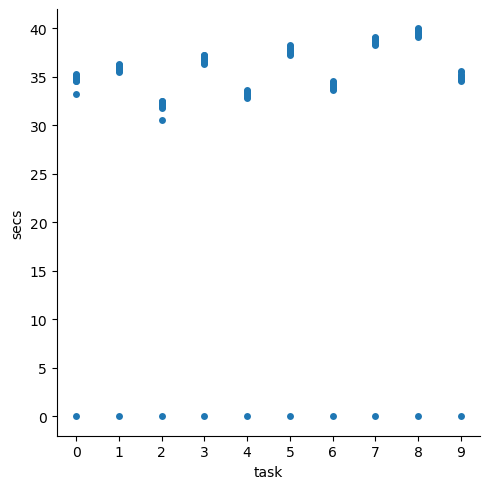

In [13]:
from datetime import datetime
import threading
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

URL = "http://localhost:8000/v1/chat/completions"
MODEL = "chatglm-6b"
MESSAGES = [{"role": ROLE_USER, "content": "Hello world!"}]
data = {"model": MODEL, "messages": MESSAGES, "stream": True}
N = 10
ts = [[] for _ in range(N)]
results = ["" for _ in range(N)]
# ts_lock = threading.Lock()

def send_fn(index: int):
    try:
        text = ""
        ts[index].append(datetime.now())
        resp = requests.post(URL, json=data, stream=True)
        resp.raise_for_status()
        for line in resp.iter_lines():
            result = json.loads(line)
            ts[index].append(datetime.now())
            text += result["choices"][0]["delta"].get("content", "")
            # print(result)
        results[index] = text
    except requests.exceptions.HTTPError as err:
        print(f"Server side error: {err.response.text}")


# Send requests with cold-start, the server will load models from disk
threads = []
for i in range(N):
    t = threading.Thread(target=send_fn, args=(i,))
    t.start()
    threads.append(t)
for i in range(N):
    threads[i].join()

earliest = min([t[0] for t in ts])
samples = []
for i in range(N):
    for t in ts[i]:
        samples.append([str(i), (t - earliest).total_seconds()])
df0 = pd.DataFrame(samples, columns=["task", "secs"])

for result in results:
    print(result)

sns.catplot(x="task", y="secs", data=df0, jitter=False)

plt.plot()


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


[]

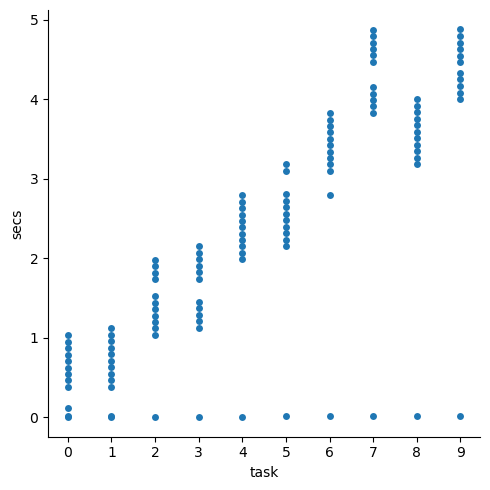

In [14]:
time.sleep(20)         # wait for model loading

ts = [[] for _ in range(N)]
# Send requests again, without cold-start
threads = []
for i in range(N):
    t = threading.Thread(target=send_fn, args=(i,))
    t.start()
    threads.append(t)
for i in range(N):
    threads[i].join()

earliest = min([t[0] for t in ts])
samples = []
for i in range(N):
    for t in ts[i]:
        samples.append([str(i), (t - earliest).total_seconds()])
df1 = pd.DataFrame(samples, columns=["task", "secs"])

sns.catplot(x="task", y="secs", data=df1, jitter=False)

plt.plot()